# LMEÈäÖÂÖàÁâ© Èö£ÊúàÈñì„Çπ„Éó„É¨„ÉÉ„Éâ Âü∫Êú¨ÂàÜÊûê

## Ê¶ÇË¶Å
„Åì„ÅÆ„Éé„Éº„Éà„Éñ„ÉÉ„ÇØ„Åß„ÅØ„ÄÅLMEÈäÖÂÖàÁâ©„ÅÆÈö£ÊúàÈñì„Çπ„Éó„É¨„ÉÉ„ÉâÔºàM1-M2„ÄÅM2-M3„ÄÅM3-M4Ôºâ„ÅÆÂü∫Êú¨ÂàÜÊûê„ÇíË°å„ÅÑ„Åæ„Åô„ÄÇ

### ÂàÜÊûêÂØæË±°
- **M1-M2„Çπ„Éó„É¨„ÉÉ„Éâ**: Á¨¨1ÈôêÊúà - Á¨¨2ÈôêÊúà
- **M2-M3„Çπ„Éó„É¨„ÉÉ„Éâ**: Á¨¨2ÈôêÊúà - Á¨¨3ÈôêÊúà  
- **M3-M4„Çπ„Éó„É¨„ÉÉ„Éâ**: Á¨¨3ÈôêÊúà - Á¨¨4ÈôêÊúà

### ÊúüÂæÖ„Åï„Çå„ÇãÊàêÊûú
- Èö£ÊúàÈñì„Çπ„Éó„É¨„ÉÉ„Éâ„ÅÆÂü∫Êú¨Áµ±Ë®àÈáè„Å®ÂàÜÂ∏ÉÁâπÊÄß
- ÂêÑ„Çπ„Éó„É¨„ÉÉ„Éâ„ÅÆÊôÇÁ≥ªÂàóÊé®Áßª„Å®„Éà„É¨„É≥„Éâ
- „Çπ„Éó„É¨„ÉÉ„ÉâÊ∞¥Ê∫ñ„ÅÆÂ≠£ÁØÄÊÄß„Å®„Éë„Çø„Éº„É≥
- „É™„Çπ„ÇØÁâπÊÄß„Å®„Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£ÂàÜÊûê

In [80]:
# ÂøÖË¶Å„É©„Ç§„Éñ„É©„É™„ÅÆ„Ç§„É≥„Éù„Éº„Éà
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2
from sqlalchemy import create_engine
import warnings
from datetime import datetime, timedelta
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from scipy import stats
import os

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [81]:
# „Éá„Éº„Çø„Éô„Éº„ÇπÊé•Á∂öË®≠ÂÆö
def get_db_connection():
    """PostgreSQL„Éá„Éº„Çø„Éô„Éº„Çπ„Å∏„ÅÆÊé•Á∂ö„ÇíÂèñÂæó"""
    try:
        engine = create_engine('postgresql://Yusuke@localhost:5432/lme_copper_db')
        return engine
    except Exception as e:
        print(f"„Éá„Éº„Çø„Éô„Éº„ÇπÊé•Á∂ö„Ç®„É©„Éº: {e}")
        return None

# „Éá„Éº„Çø„Éô„Éº„ÇπÊé•Á∂ö„ÉÜ„Çπ„Éà
engine = get_db_connection()
if engine:
    print("‚úÖ „Éá„Éº„Çø„Éô„Éº„ÇπÊé•Á∂öÊàêÂäü")
else:
    print("‚ùå „Éá„Éº„Çø„Éô„Éº„ÇπÊé•Á∂öÂ§±Êïó")

‚úÖ „Éá„Éº„Çø„Éô„Éº„ÇπÊé•Á∂öÊàêÂäü


## 1. „Éá„Éº„ÇøÂèñÂæó„Å®ÂâçÂá¶ÁêÜ

In [82]:
def load_futures_data():
    """ÂÖàÁâ©„Éá„Éº„Çø„ÅÆÂèñÂæó"""
    query = """
    SELECT 
        trade_date,
        contract_month,
        close_price,
        volume,
        open_interest,
        ric
    FROM lme_copper_futures 
    WHERE contract_month IN (1, 2, 3, 4)
        AND close_price IS NOT NULL
        AND close_price > 0
    ORDER BY trade_date, contract_month
    """
    
    df = pd.read_sql(query, engine)
    df['trade_date'] = pd.to_datetime(df['trade_date'])
    
    print(f"üìä „Éá„Éº„ÇøÂèñÂæóÂÆå‰∫Ü:")
    print(f"   Á∑è„É¨„Ç≥„Éº„ÉâÊï∞: {len(df):,}")
    print(f"   „Éá„Éº„ÇøÊúüÈñì: {df['trade_date'].min()} ÔΩû {df['trade_date'].max()}")
    print(f"   ÈôêÊúàÂà•„É¨„Ç≥„Éº„ÉâÊï∞:")
    for month in [1, 2, 3, 4]:
        count = len(df[df['contract_month'] == month])
        print(f"     M{month}: {count:,} „É¨„Ç≥„Éº„Éâ")
    
    return df

# „Éá„Éº„ÇøÂèñÂæó
futures_data = load_futures_data()

üìä „Éá„Éº„ÇøÂèñÂæóÂÆå‰∫Ü:
   Á∑è„É¨„Ç≥„Éº„ÉâÊï∞: 4,991
   „Éá„Éº„ÇøÊúüÈñì: 2020-07-06 00:00:00 ÔΩû 2025-07-04 00:00:00
   ÈôêÊúàÂà•„É¨„Ç≥„Éº„ÉâÊï∞:
     M1: 1,202 „É¨„Ç≥„Éº„Éâ
     M2: 1,263 „É¨„Ç≥„Éº„Éâ
     M3: 1,263 „É¨„Ç≥„Éº„Éâ
     M4: 1,263 „É¨„Ç≥„Éº„Éâ


In [83]:
def calculate_adjacent_spreads(df):
    """Èö£ÊúàÈñì„Çπ„Éó„É¨„ÉÉ„Éâ„ÅÆË®àÁÆó"""
    # „Éá„Éº„Çø„Çí„Éî„Éú„ÉÉ„Éà„Åó„Å¶ÈôêÊúàÂà•„Ç´„É©„É†„Å´Â§âÊèõ
    pivot_df = df.pivot(index='trade_date', columns='contract_month', values='close_price')
    
    # „Ç´„É©„É†Âêç„ÇíÂàÜ„Åã„Çä„ÇÑ„Åô„ÅèÂ§âÊõ¥
    pivot_df.columns = [f'M{int(col)}' for col in pivot_df.columns]
    
    # Èö£ÊúàÈñì„Çπ„Éó„É¨„ÉÉ„Éâ„ÇíË®àÁÆó
    spreads_df = pd.DataFrame(index=pivot_df.index)
    
    spreads_df['M1_price'] = pivot_df['M1']
    spreads_df['M2_price'] = pivot_df['M2']
    spreads_df['M3_price'] = pivot_df['M3']
    spreads_df['M4_price'] = pivot_df['M4']
    
    # „Çπ„Éó„É¨„ÉÉ„Éâ„ÅÆË®àÁÆóÔºàÂâçÈôêÊúà - ÂæåÈôêÊúàÔºâ
    spreads_df['M1_M2_spread'] = pivot_df['M1'] - pivot_df['M2']
    spreads_df['M2_M3_spread'] = pivot_df['M2'] - pivot_df['M3']
    spreads_df['M3_M4_spread'] = pivot_df['M3'] - pivot_df['M4']
    
    # „Çπ„Éó„É¨„ÉÉ„ÉâÂ§âÂåñÁéáÔºàÊó•Ê¨°„É™„Çø„Éº„É≥Ôºâ
    spreads_df['M1_M2_spread_change'] = spreads_df['M1_M2_spread'].pct_change()
    spreads_df['M2_M3_spread_change'] = spreads_df['M2_M3_spread'].pct_change()
    spreads_df['M3_M4_spread_change'] = spreads_df['M3_M4_spread'].pct_change()
    
    # NaNÂÄ§„ÇíÈô§Âéª
    spreads_df = spreads_df.dropna()
    
    print(f"üìà „Çπ„Éó„É¨„ÉÉ„ÉâË®àÁÆóÂÆå‰∫Ü:")
    print(f"   ÊúâÂäπ„Éá„Éº„ÇøÊï∞: {len(spreads_df):,}")
    print(f"   Ê¨†ÊêçÂÄ§Èô§ÂéªÂæåÊúüÈñì: {spreads_df.index.min()} ÔΩû {spreads_df.index.max()}")
    
    return spreads_df

# „Çπ„Éó„É¨„ÉÉ„ÉâË®àÁÆó
spreads_data = calculate_adjacent_spreads(futures_data)

# „Éá„Éº„Çø„ÅÆÂÖàÈ†≠Á¢∫Ë™ç
print("\nüìã Ë®àÁÆó„Åï„Çå„Åü„Çπ„Éó„É¨„ÉÉ„Éâ„Éá„Éº„ÇøÔºàÁõ¥Ëøë5Êó•ÂàÜÔºâ:")
print(spreads_data.tail())

üìà „Çπ„Éó„É¨„ÉÉ„ÉâË®àÁÆóÂÆå‰∫Ü:
   ÊúâÂäπ„Éá„Éº„ÇøÊï∞: 1,198
   Ê¨†ÊêçÂÄ§Èô§ÂéªÂæåÊúüÈñì: 2020-07-07 00:00:00 ÔΩû 2025-07-04 00:00:00

üìã Ë®àÁÆó„Åï„Çå„Åü„Çπ„Éó„É¨„ÉÉ„Éâ„Éá„Éº„ÇøÔºàÁõ¥Ëøë5Êó•ÂàÜÔºâ:
            M1_price  M2_price  M3_price  M4_price  M1_M2_spread  \
trade_date                                                         
2025-06-30   9945.23   9906.38   9882.68   9865.44         38.85   
2025-07-01   9997.29   9962.55   9945.03   9930.09         34.74   
2025-07-02  10070.10  10038.46  10023.00  10009.82         31.64   
2025-07-03  10010.67   9977.38   9963.00   9951.31         33.29   
2025-07-04   9923.29   9887.30   9873.62   9861.73         35.99   

            M2_M3_spread  M3_M4_spread  M1_M2_spread_change  \
trade_date                                                    
2025-06-30         23.70         17.24            -0.028507   
2025-07-01         17.52         14.94            -0.105792   
2025-07-02         15.46         13.18            -0.089234   
2025-0

## 2. Âü∫Êú¨Áµ±Ë®àÈáè„Å®„Éá„Éº„ÇøÊ¶ÇË¶Å

In [84]:
def calculate_basic_statistics(df):
    """Âü∫Êú¨Áµ±Ë®àÈáè„ÅÆË®àÁÆó"""
    spread_columns = ['M1_M2_spread', 'M2_M3_spread', 'M3_M4_spread']
    
    stats_df = pd.DataFrame()
    
    for col in spread_columns:
        spread_name = col.replace('_spread', '').replace('_', '-')
        
        stats_df[spread_name] = [
            df[col].count(),           # ÊúâÂäπ„Éá„Éº„ÇøÊï∞
            df[col].mean(),            # Âπ≥Âùá
            df[col].median(),          # ‰∏≠Â§ÆÂÄ§
            df[col].std(),             # Ê®ôÊ∫ñÂÅèÂ∑Æ
            df[col].min(),             # ÊúÄÂ∞èÂÄ§
            df[col].max(),             # ÊúÄÂ§ßÂÄ§
            df[col].quantile(0.25),    # Á¨¨1ÂõõÂàÜ‰ΩçÊï∞
            df[col].quantile(0.75),    # Á¨¨3ÂõõÂàÜ‰ΩçÊï∞
            df[col].skew(),            # Ê≠™Â∫¶
            df[col].kurtosis(),        # Â∞ñÂ∫¶
        ]
    
    stats_df.index = ['„Éá„Éº„ÇøÊï∞', 'Âπ≥Âùá', '‰∏≠Â§ÆÂÄ§', 'Ê®ôÊ∫ñÂÅèÂ∑Æ', 'ÊúÄÂ∞èÂÄ§', 'ÊúÄÂ§ßÂÄ§', 
                      'Q1(25%)', 'Q3(75%)', 'Ê≠™Â∫¶', 'Â∞ñÂ∫¶']
    
    return stats_df

# Âü∫Êú¨Áµ±Ë®àÈáè„ÇíË®àÁÆó
basic_stats = calculate_basic_statistics(spreads_data)

print("üìä Èö£ÊúàÈñì„Çπ„Éó„É¨„ÉÉ„ÉâÂü∫Êú¨Áµ±Ë®àÈáè:")
print("=" * 50)
print(basic_stats.round(4))

üìä Èö£ÊúàÈñì„Çπ„Éó„É¨„ÉÉ„ÉâÂü∫Êú¨Áµ±Ë®àÈáè:
             M1-M2      M2-M3      M3-M4
„Éá„Éº„ÇøÊï∞     1198.0000  1198.0000  1198.0000
Âπ≥Âùá         -7.3683    -6.4624    -5.8316
‰∏≠Â§ÆÂÄ§        -5.0000    -3.1800    -2.2500
Ê®ôÊ∫ñÂÅèÂ∑Æ       42.9368    21.8381    18.2204
ÊúÄÂ∞èÂÄ§       -68.7900   -55.4400   -48.9200
ÊúÄÂ§ßÂÄ§      1060.0000   106.0000    42.0000
Q1(25%)   -30.8750   -21.9375   -18.7575
Q3(75%)     4.0000     3.0000     3.5000
Ê≠™Â∫¶         13.5506     0.1747    -0.3792
Â∞ñÂ∫¶        321.5406     0.7680    -0.2836


In [85]:
# „Çπ„Éó„É¨„ÉÉ„Éâ„ÅÆÂàÜÂ∏ÉÁâπÊÄß„ÇíË©≥Á¥∞ÂàÜÊûê
def analyze_spread_characteristics(df):
    """„Çπ„Éó„É¨„ÉÉ„ÉâÁâπÊÄß„ÅÆË©≥Á¥∞ÂàÜÊûê"""
    spread_columns = ['M1_M2_spread', 'M2_M3_spread', 'M3_M4_spread']
    
    print("\nüîç Èö£ÊúàÈñì„Çπ„Éó„É¨„ÉÉ„ÉâÁâπÊÄßÂàÜÊûê:")
    print("=" * 60)
    
    for col in spread_columns:
        spread_name = col.replace('_spread', '').replace('_', '-')
        data = df[col]
        
        # Ê≠£ÂÄ§„ÉªË≤†ÂÄ§„ÅÆÂàÜÂ∏É
        positive_ratio = (data > 0).mean() * 100
        negative_ratio = (data < 0).mean() * 100
        zero_ratio = (data == 0).mean() * 100
        
        # Ê•µÂÄ§„ÅÆÈ†ªÂ∫¶
        q95 = data.quantile(0.95)
        q05 = data.quantile(0.05)
        extreme_high = (data > q95).sum()
        extreme_low = (data < q05).sum()
        
        print(f"\n{spread_name}„Çπ„Éó„É¨„ÉÉ„Éâ:")
        print(f"  Ê≠£ÂÄ§Ôºà„Ç≥„É≥„Çø„É≥„Ç¥Ôºâ: {positive_ratio:.1f}%")
        print(f"  Ë≤†ÂÄ§Ôºà„Éê„ÉÉ„ÇØ„ÉØ„Éº„Éá„Éº„Ç∑„Éß„É≥Ôºâ: {negative_ratio:.1f}%")
        print(f"  „Çº„É≠Ôºà„Éï„É©„ÉÉ„ÉàÔºâ: {zero_ratio:.1f}%")
        print(f"  95%ÂàÜ‰ΩçÁÇπË∂ÖÈÅé: {extreme_high}Âõû ({extreme_high/len(data)*100:.1f}%)")
        print(f"  5%ÂàÜ‰ΩçÁÇπÊú™Ê∫Ä: {extreme_low}Âõû ({extreme_low/len(data)*100:.1f}%)")
        print(f"  Â§âÂãïÂπÖÔºàMax-MinÔºâ: {data.max() - data.min():.2f} USD/t")

analyze_spread_characteristics(spreads_data)


üîç Èö£ÊúàÈñì„Çπ„Éó„É¨„ÉÉ„ÉâÁâπÊÄßÂàÜÊûê:

M1-M2„Çπ„Éó„É¨„ÉÉ„Éâ:
  Ê≠£ÂÄ§Ôºà„Ç≥„É≥„Çø„É≥„Ç¥Ôºâ: 36.7%
  Ë≤†ÂÄ§Ôºà„Éê„ÉÉ„ÇØ„ÉØ„Éº„Éá„Éº„Ç∑„Éß„É≥Ôºâ: 62.4%
  „Çº„É≠Ôºà„Éï„É©„ÉÉ„ÉàÔºâ: 0.9%
  95%ÂàÜ‰ΩçÁÇπË∂ÖÈÅé: 60Âõû (5.0%)
  5%ÂàÜ‰ΩçÁÇπÊú™Ê∫Ä: 60Âõû (5.0%)
  Â§âÂãïÂπÖÔºàMax-MinÔºâ: 1128.79 USD/t

M2-M3„Çπ„Éó„É¨„ÉÉ„Éâ:
  Ê≠£ÂÄ§Ôºà„Ç≥„É≥„Çø„É≥„Ç¥Ôºâ: 36.6%
  Ë≤†ÂÄ§Ôºà„Éê„ÉÉ„ÇØ„ÉØ„Éº„Éá„Éº„Ç∑„Éß„É≥Ôºâ: 61.7%
  „Çº„É≠Ôºà„Éï„É©„ÉÉ„ÉàÔºâ: 1.8%
  95%ÂàÜ‰ΩçÁÇπË∂ÖÈÅé: 60Âõû (5.0%)
  5%ÂàÜ‰ΩçÁÇπÊú™Ê∫Ä: 60Âõû (5.0%)
  Â§âÂãïÂπÖÔºàMax-MinÔºâ: 161.44 USD/t

M3-M4„Çπ„Éó„É¨„ÉÉ„Éâ:
  Ê≠£ÂÄ§Ôºà„Ç≥„É≥„Çø„É≥„Ç¥Ôºâ: 40.4%
  Ë≤†ÂÄ§Ôºà„Éê„ÉÉ„ÇØ„ÉØ„Éº„Éá„Éº„Ç∑„Éß„É≥Ôºâ: 58.6%
  „Çº„É≠Ôºà„Éï„É©„ÉÉ„ÉàÔºâ: 1.0%
  95%ÂàÜ‰ΩçÁÇπË∂ÖÈÅé: 60Âõû (5.0%)
  5%ÂàÜ‰ΩçÁÇπÊú™Ê∫Ä: 60Âõû (5.0%)
  Â§âÂãïÂπÖÔºàMax-MinÔºâ: 90.92 USD/t


## 3. ÊôÇÁ≥ªÂàóÊé®Áßª„Å®„Éà„É¨„É≥„ÉâÂàÜÊûê

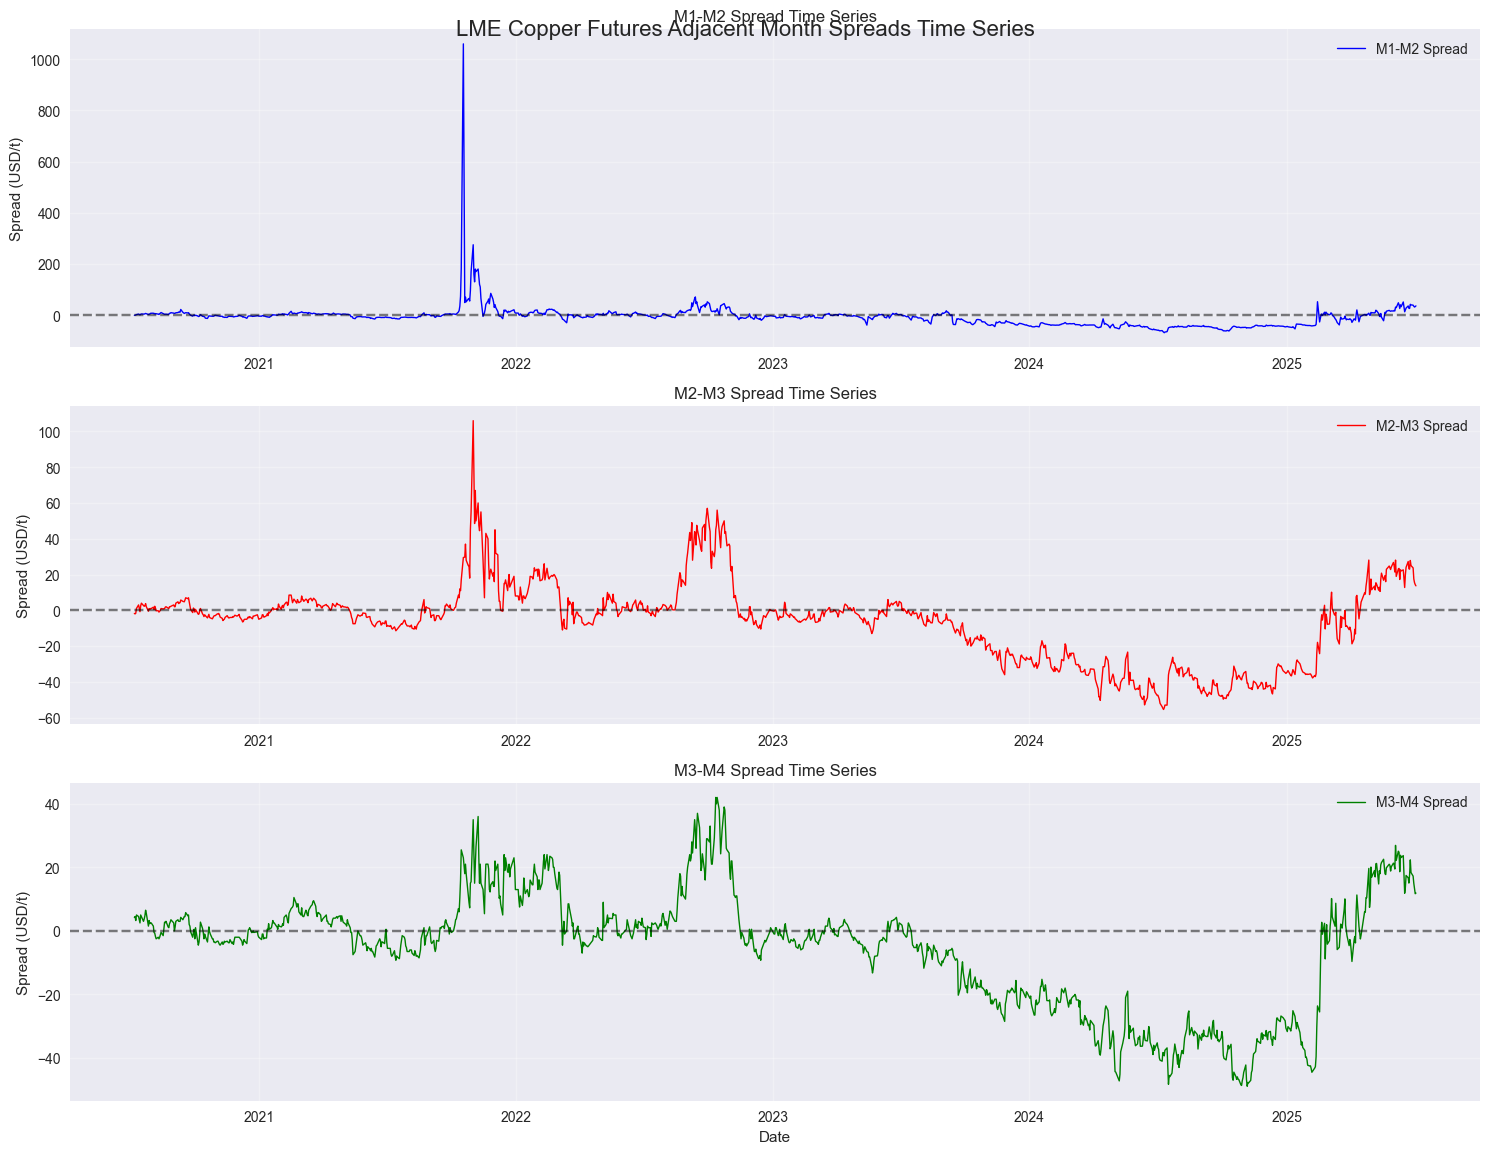

In [86]:
# Èö£ÊúàÈñì„Çπ„Éó„É¨„ÉÉ„Éâ„ÅÆÊôÇÁ≥ªÂàó„ÉÅ„É£„Éº„Éà
def plot_spread_timeseries(df):
    """Èö£ÊúàÈñì„Çπ„Éó„É¨„ÉÉ„Éâ„ÅÆÊôÇÁ≥ªÂàó„ÉÅ„É£„Éº„ÉàÔºàmatplotlibÁâàÔºâ"""
    fig, axes = plt.subplots(3, 1, figsize=(15, 12))
    
    spreads = [
        ('M1_M2_spread', 'M1-M2', 'blue'),
        ('M2_M3_spread', 'M2-M3', 'red'),
        ('M3_M4_spread', 'M3-M4', 'green')
    ]
    
    for i, (col, name, color) in enumerate(spreads):
        axes[i].plot(df.index, df[col], color=color, linewidth=1, label=f"{name} Spread")
        axes[i].axhline(y=0, color='black', linestyle='--', alpha=0.5)
        axes[i].set_title(f'{name} Spread Time Series')
        axes[i].set_ylabel('Spread (USD/t)')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)
    
    axes[-1].set_xlabel('Date')
    plt.suptitle('LME Copper Futures Adjacent Month Spreads Time Series', fontsize=16, y=0.95)
    plt.tight_layout()
    
    return fig

# „ÉÅ„É£„Éº„ÉàË°®Á§∫
spread_chart = plot_spread_timeseries(spreads_data)
plt.show()

# ÁîªÂÉè‰øùÂ≠ò
os.makedirs('../../generated_images', exist_ok=True)
spread_chart.savefig('../../generated_images/adjacent_spreads_timeseries.png', 
                    dpi=300, bbox_inches='tight')

In [87]:
# „Çπ„Éó„É¨„ÉÉ„Éâ„ÅÆÁßªÂãïÂπ≥Âùá„Å®„Éà„É¨„É≥„ÉâÂàÜÊûê
def calculate_trend_analysis(df):
    """„Éà„É¨„É≥„ÉâÂàÜÊûê„Å®„ÉÜ„ÇØ„Éã„Ç´„É´ÊåáÊ®ô"""
    spread_columns = ['M1_M2_spread', 'M2_M3_spread', 'M3_M4_spread']
    
    trend_df = df.copy()
    
    for col in spread_columns:
        # ÁßªÂãïÂπ≥Âùá
        trend_df[f'{col}_ma5'] = df[col].rolling(window=5).mean()
        trend_df[f'{col}_ma20'] = df[col].rolling(window=20).mean()
        trend_df[f'{col}_ma60'] = df[col].rolling(window=60).mean()
        
        # „Éú„É™„É≥„Ç∏„É£„Éº„Éê„É≥„ÉâÔºà20Êó•„ÄÅ2œÉÔºâ
        ma20 = trend_df[f'{col}_ma20']
        std20 = df[col].rolling(window=20).std()
        trend_df[f'{col}_bb_upper'] = ma20 + (std20 * 2)
        trend_df[f'{col}_bb_lower'] = ma20 - (std20 * 2)
        
        # RSIÔºà14Êó•Ôºâ
        delta = df[col].diff()
        gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
        rs = gain / loss
        trend_df[f'{col}_rsi'] = 100 - (100 / (1 + rs))
    
    return trend_df

# „Éà„É¨„É≥„ÉâÂàÜÊûêÂÆüË°å
trend_data = calculate_trend_analysis(spreads_data)

print("üìà „Éà„É¨„É≥„ÉâÂàÜÊûêÊåáÊ®ô„ÇíË®àÁÆó„Åó„Åæ„Åó„Åü:")
print(f"   ÁßªÂãïÂπ≥Âùá: 5Êó•„ÄÅ20Êó•„ÄÅ60Êó•")
print(f"   „Éú„É™„É≥„Ç∏„É£„Éº„Éê„É≥„Éâ: 20Êó•¬±2œÉ")
print(f"   RSI: 14Êó•")

üìà „Éà„É¨„É≥„ÉâÂàÜÊûêÊåáÊ®ô„ÇíË®àÁÆó„Åó„Åæ„Åó„Åü:
   ÁßªÂãïÂπ≥Âùá: 5Êó•„ÄÅ20Êó•„ÄÅ60Êó•
   „Éú„É™„É≥„Ç∏„É£„Éº„Éê„É≥„Éâ: 20Êó•¬±2œÉ
   RSI: 14Êó•


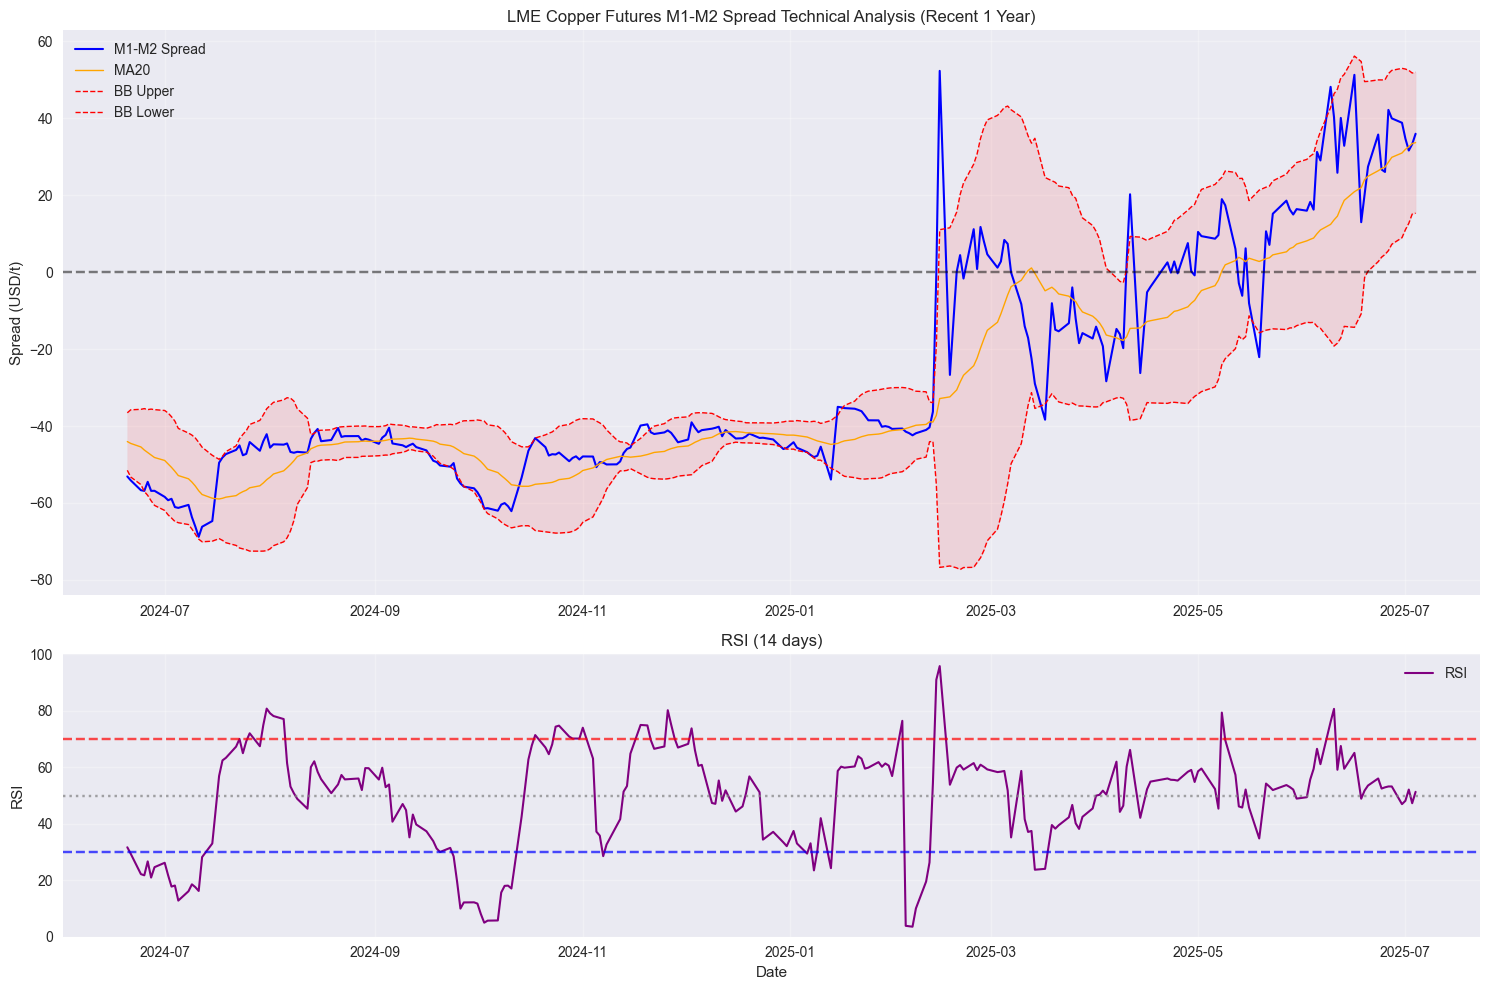

In [88]:
# M1-M2„Çπ„Éó„É¨„ÉÉ„Éâ„ÅÆ„ÉÜ„ÇØ„Éã„Ç´„É´ÂàÜÊûê„ÉÅ„É£„Éº„Éà
def plot_technical_analysis(df, spread_col='M1_M2_spread', title='M1-M2'):
    """„ÉÜ„ÇØ„Éã„Ç´„É´ÂàÜÊûê„ÉÅ„É£„Éº„ÉàÔºàmatplotlibÁâàÔºâ"""
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), height_ratios=[2, 1])
    
    # Áõ¥Ëøë1Âπ¥ÂàÜ„ÅÆ„Éá„Éº„Çø
    recent_data = df.iloc[-252:] if len(df) > 252 else df
    
    # „É°„Ç§„É≥„ÉÅ„É£„Éº„ÉàÔºà„Çπ„Éó„É¨„ÉÉ„Éâ + ÁßªÂãïÂπ≥Âùá + „Éú„É™„É≥„Ç∏„É£„Éº„Éê„É≥„ÉâÔºâ
    ax1.plot(recent_data.index, recent_data[spread_col], 
             label=f'{title} Spread', color='blue', linewidth=1.5)
    ax1.plot(recent_data.index, recent_data[f'{spread_col}_ma20'], 
             label='MA20', color='orange', linewidth=1)
    
    # „Éú„É™„É≥„Ç∏„É£„Éº„Éê„É≥„Éâ
    ax1.plot(recent_data.index, recent_data[f'{spread_col}_bb_upper'], 
             label='BB Upper', color='red', linewidth=1, linestyle='--')
    ax1.plot(recent_data.index, recent_data[f'{spread_col}_bb_lower'], 
             label='BB Lower', color='red', linewidth=1, linestyle='--')
    ax1.fill_between(recent_data.index, 
                     recent_data[f'{spread_col}_bb_upper'], 
                     recent_data[f'{spread_col}_bb_lower'], 
                     alpha=0.1, color='red')
    
    # „Çº„É≠„É©„Ç§„É≥
    ax1.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    
    ax1.set_title(f'LME Copper Futures {title} Spread Technical Analysis (Recent 1 Year)')
    ax1.set_ylabel('Spread (USD/t)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # RSI
    ax2.plot(recent_data.index, recent_data[f'{spread_col}_rsi'], 
             color='purple', linewidth=1.5, label='RSI')
    ax2.axhline(y=70, color='red', linestyle='--', alpha=0.7)
    ax2.axhline(y=30, color='blue', linestyle='--', alpha=0.7)
    ax2.axhline(y=50, color='gray', linestyle=':', alpha=0.7)
    
    ax2.set_title('RSI (14 days)')
    ax2.set_ylabel('RSI')
    ax2.set_xlabel('Date')
    ax2.set_ylim(0, 100)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    return fig

# M1-M2„Çπ„Éó„É¨„ÉÉ„Éâ„ÅÆ„ÉÜ„ÇØ„Éã„Ç´„É´ÂàÜÊûê
tech_chart = plot_technical_analysis(trend_data, 'M1_M2_spread', 'M1-M2')
plt.show()

# ÁîªÂÉè‰øùÂ≠ò
tech_chart.savefig('../../generated_images/m1_m2_spread_technical_analysis.png', 
                  dpi=300, bbox_inches='tight')

## 4. „Çπ„Éó„É¨„ÉÉ„ÉâÂàÜÂ∏É„Å®„É™„Çπ„ÇØÂàÜÊûê

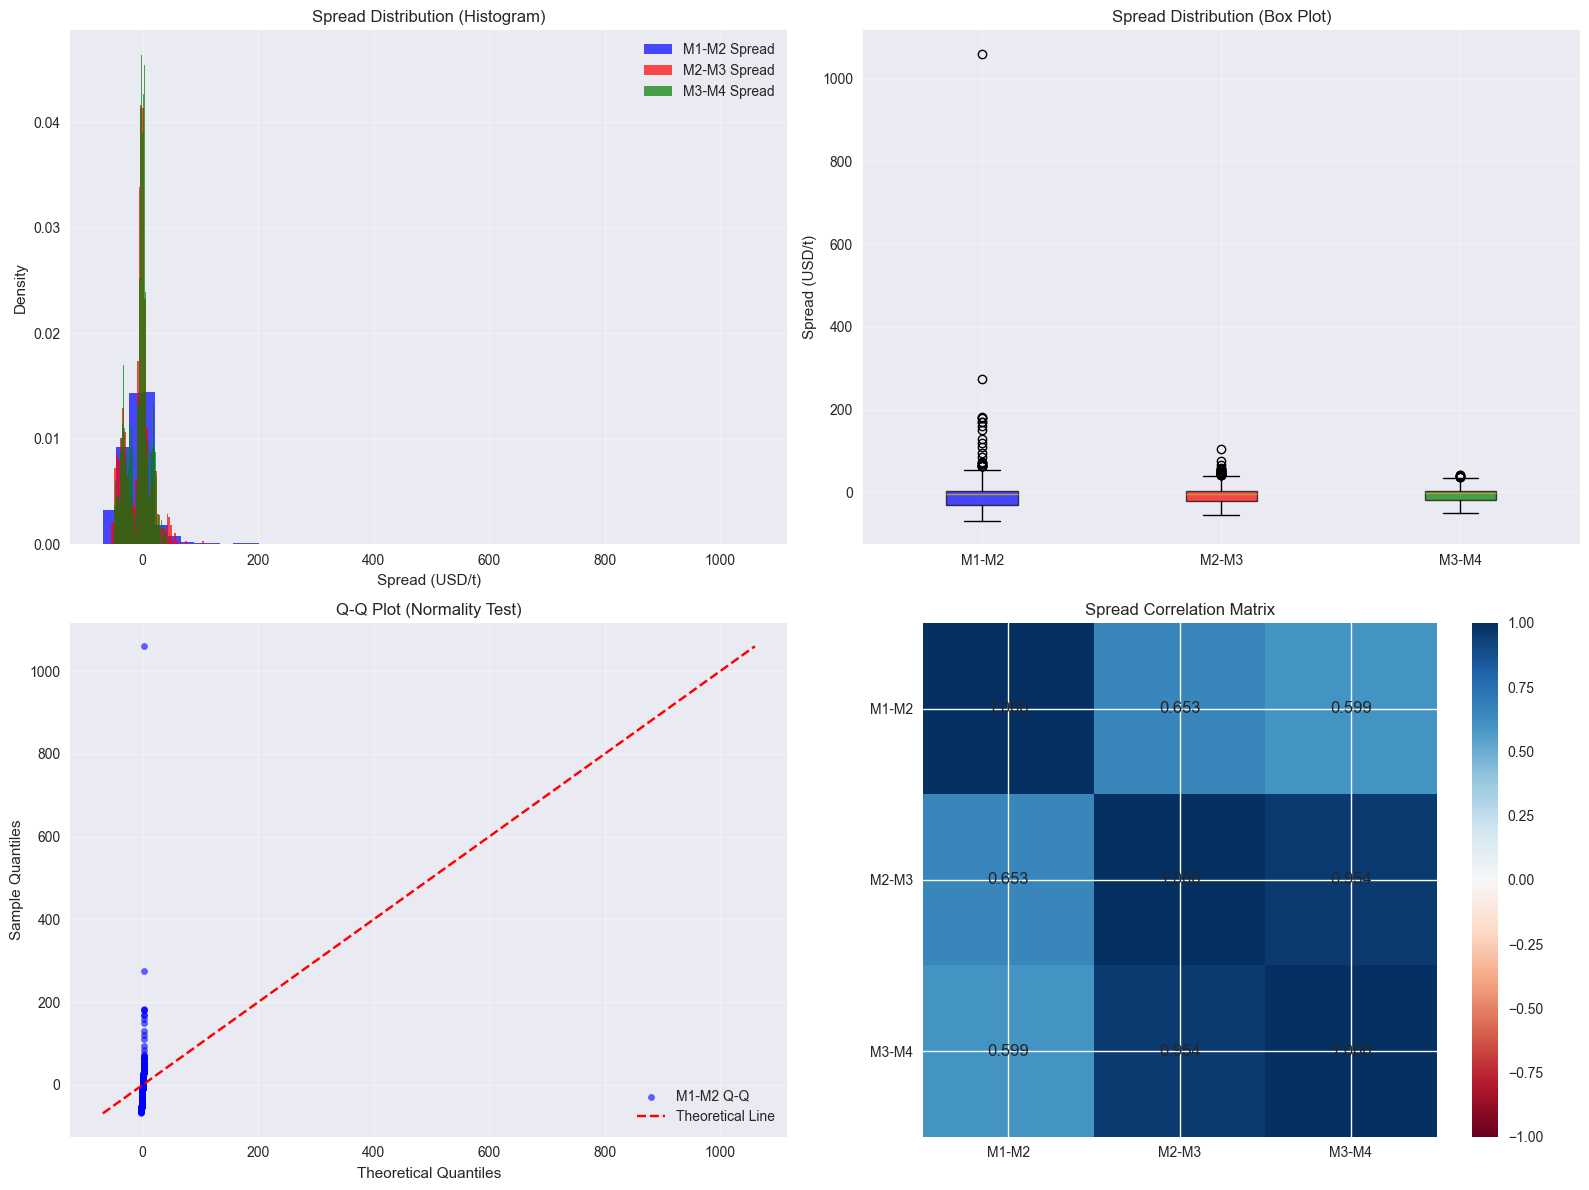

In [89]:
# „Çπ„Éó„É¨„ÉÉ„ÉâÂàÜÂ∏É„ÅÆË©≥Á¥∞ÂàÜÊûê
def plot_spread_distributions(df):
    """„Çπ„Éó„É¨„ÉÉ„ÉâÂàÜÂ∏É„ÅÆÂèØË¶ñÂåñÔºàmatplotlibÁâàÔºâ"""
    spread_columns = ['M1_M2_spread', 'M2_M3_spread', 'M3_M4_spread']
    spread_names = ['M1-M2', 'M2-M3', 'M3-M4']
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    colors = ['blue', 'red', 'green']
    
    # 1. „Éí„Çπ„Éà„Ç∞„É©„É†
    for i, (col, name, color) in enumerate(zip(spread_columns, spread_names, colors)):
        ax1.hist(df[col], bins=50, alpha=0.7, color=color, label=f'{name} Spread', density=True)
    ax1.set_title('Spread Distribution (Histogram)')
    ax1.set_xlabel('Spread (USD/t)')
    ax1.set_ylabel('Density')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 2. „Éú„ÉÉ„ÇØ„Çπ„Éó„É≠„ÉÉ„Éà
    box_data = [df[col].dropna() for col in spread_columns]
    bp = ax2.boxplot(box_data, labels=spread_names, patch_artist=True)
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    ax2.set_title('Spread Distribution (Box Plot)')
    ax2.set_ylabel('Spread (USD/t)')
    ax2.grid(True, alpha=0.3)
    
    # 3. Q-Q„Éó„É≠„ÉÉ„ÉàÔºàM1-M2„Çπ„Éó„É¨„ÉÉ„Éâ„ÅÆ„ÅøÔºâ
    from scipy.stats import probplot
    
    # „Éá„Éº„Çø„ÇíÊ∏ÖÁêÜ„Åó„Å¶NaN„ÇíÈô§Âéª
    clean_data = df['M1_M2_spread'].dropna()
    
    # probplot„ÅÆÊ≠£„Åó„ÅÑ‰ΩøÁî®ÊñπÊ≥ï
    prob_result = probplot(clean_data, dist="norm", plot=None)
    theoretical_quantiles = prob_result[0][0]
    sample_quantiles = prob_result[0][1]
    
    ax3.scatter(theoretical_quantiles, sample_quantiles, alpha=0.6, s=20, color='blue', label='M1-M2 Q-Q')
    
    # ÁêÜË´ñÁ∑ö„ÅÆË®àÁÆó
    min_val = min(theoretical_quantiles.min(), sample_quantiles.min())
    max_val = max(theoretical_quantiles.max(), sample_quantiles.max())
    ax3.plot([min_val, max_val], [min_val, max_val], 'r--', label='Theoretical Line')
    
    ax3.set_title('Q-Q Plot (Normality Test)')
    ax3.set_xlabel('Theoretical Quantiles')
    ax3.set_ylabel('Sample Quantiles')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # 4. Áõ∏Èñ¢Ë°åÂàó„ÅÆ„Éí„Éº„Éà„Éû„ÉÉ„Éó
    corr_matrix = df[spread_columns].corr()
    im = ax4.imshow(corr_matrix, cmap='RdBu', vmin=-1, vmax=1)
    
    # Áõ∏Èñ¢‰øÇÊï∞„ÅÆÂÄ§„ÇíË°®Á§∫
    for i in range(len(spread_names)):
        for j in range(len(spread_names)):
            ax4.text(j, i, f'{corr_matrix.iloc[i, j]:.3f}', 
                    ha='center', va='center', fontsize=12)
    
    ax4.set_xticks(range(len(spread_names)))
    ax4.set_yticks(range(len(spread_names)))
    ax4.set_xticklabels(spread_names)
    ax4.set_yticklabels(spread_names)
    ax4.set_title('Spread Correlation Matrix')
    
    # „Ç´„É©„Éº„Éê„Éº
    plt.colorbar(im, ax=ax4)
    
    plt.tight_layout()
    return fig

# ÂàÜÂ∏ÉÂàÜÊûê„ÉÅ„É£„Éº„Éà
dist_chart = plot_spread_distributions(spreads_data)
plt.show()

# ÁîªÂÉè‰øùÂ≠ò
dist_chart.savefig('../../generated_images/adjacent_spreads_distribution_analysis.png', 
                  dpi=300, bbox_inches='tight')

In [90]:
# Ê≠£Ë¶èÊÄßÊ§úÂÆö„Å®Áµ±Ë®àÁöÑÊ§úÂÆö
def statistical_tests(df):
    """Áµ±Ë®àÁöÑÊ§úÂÆö„ÅÆÂÆüË°å"""
    spread_columns = ['M1_M2_spread', 'M2_M3_spread', 'M3_M4_spread']
    spread_names = ['M1-M2', 'M2-M3', 'M3-M4']
    
    print("üî¨ Áµ±Ë®àÁöÑÊ§úÂÆöÁµêÊûú:")
    print("=" * 60)
    
    test_results = {}
    
    for col, name in zip(spread_columns, spread_names):
        data = df[col].dropna()
        
        # Shapiro-WilkÊ≠£Ë¶èÊÄßÊ§úÂÆö
        if len(data) <= 5000:  # „Çµ„É≥„Éó„É´Êï∞Âà∂Èôê
            shapiro_stat, shapiro_p = stats.shapiro(data)
        else:
            shapiro_stat, shapiro_p = stats.shapiro(data.sample(5000))
        
        # Jarque-BeraÊ≠£Ë¶èÊÄßÊ§úÂÆö
        jb_stat, jb_p = stats.jarque_bera(data)
        
        # Kolmogorov-SmirnovÊ≠£Ë¶èÊÄßÊ§úÂÆö
        ks_stat, ks_p = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
        
        # Augmented Dickey-FullerÂçò‰ΩçÊ†πÊ§úÂÆöÔºàÂÆöÂ∏∏ÊÄßÔºâ
        from statsmodels.tsa.stattools import adfuller
        adf_result = adfuller(data)
        
        test_results[name] = {
            'shapiro': (shapiro_stat, shapiro_p),
            'jarque_bera': (jb_stat, jb_p),
            'ks_test': (ks_stat, ks_p),
            'adf': adf_result
        }
        
        print(f"\n{name}„Çπ„Éó„É¨„ÉÉ„Éâ:")
        print(f"  Shapiro-WilkÊ≠£Ë¶èÊÄßÊ§úÂÆö: Áµ±Ë®àÈáè={shapiro_stat:.4f}, pÂÄ§={shapiro_p:.4f}")
        print(f"  Jarque-BeraÊ≠£Ë¶èÊÄßÊ§úÂÆö: Áµ±Ë®àÈáè={jb_stat:.4f}, pÂÄ§={jb_p:.4f}")
        print(f"  K-SÊ≠£Ë¶èÊÄßÊ§úÂÆö: Áµ±Ë®àÈáè={ks_stat:.4f}, pÂÄ§={ks_p:.4f}")
        print(f"  ADFÂçò‰ΩçÊ†πÊ§úÂÆö: Áµ±Ë®àÈáè={adf_result[0]:.4f}, pÂÄ§={adf_result[1]:.4f}")
        
        # Ëß£Èáà
        normal_tests = [shapiro_p, jb_p, ks_p]
        if all(p < 0.05 for p in normal_tests):
            print(f"  ‚Üí Ê≠£Ë¶èÂàÜÂ∏É„Åß„ÅØ„Å™„ÅÑÔºàÂÖ®Ê§úÂÆö„Åßp<0.05Ôºâ")
        elif any(p >= 0.05 for p in normal_tests):
            print(f"  ‚Üí Ê≠£Ë¶èÂàÜÂ∏É„ÅÆÂèØËÉΩÊÄß„ÅÇ„ÇäÔºà‰∏ÄÈÉ®Ê§úÂÆö„Åßp‚â•0.05Ôºâ")
        
        if adf_result[1] < 0.05:
            print(f"  ‚Üí ÂÆöÂ∏∏Á≥ªÂàóÔºàADFÊ§úÂÆöp<0.05Ôºâ")
        else:
            print(f"  ‚Üí ÈùûÂÆöÂ∏∏Á≥ªÂàó„ÅÆÂèØËÉΩÊÄßÔºàADFÊ§úÂÆöp‚â•0.05Ôºâ")
    
    return test_results

# Áµ±Ë®àÁöÑÊ§úÂÆöÂÆüË°å
test_results = statistical_tests(spreads_data)

üî¨ Áµ±Ë®àÁöÑÊ§úÂÆöÁµêÊûú:

M1-M2„Çπ„Éó„É¨„ÉÉ„Éâ:
  Shapiro-WilkÊ≠£Ë¶èÊÄßÊ§úÂÆö: Áµ±Ë®àÈáè=0.4934, pÂÄ§=0.0000
  Jarque-BeraÊ≠£Ë¶èÊÄßÊ§úÂÆö: Áµ±Ë®àÈáè=5154274.7456, pÂÄ§=0.0000
  K-SÊ≠£Ë¶èÊÄßÊ§úÂÆö: Áµ±Ë®àÈáè=0.2099, pÂÄ§=0.0000
  ADFÂçò‰ΩçÊ†πÊ§úÂÆö: Áµ±Ë®àÈáè=-3.6510, pÂÄ§=0.0049
  ‚Üí Ê≠£Ë¶èÂàÜÂ∏É„Åß„ÅØ„Å™„ÅÑÔºàÂÖ®Ê§úÂÆö„Åßp<0.05Ôºâ
  ‚Üí ÂÆöÂ∏∏Á≥ªÂàóÔºàADFÊ§úÂÆöp<0.05Ôºâ

M2-M3„Çπ„Éó„É¨„ÉÉ„Éâ:
  Shapiro-WilkÊ≠£Ë¶èÊÄßÊ§úÂÆö: Áµ±Ë®àÈáè=0.9503, pÂÄ§=0.0000
  Jarque-BeraÊ≠£Ë¶èÊÄßÊ§úÂÆö: Áµ±Ë®àÈáè=34.8976, pÂÄ§=0.0000
  K-SÊ≠£Ë¶èÊÄßÊ§úÂÆö: Áµ±Ë®àÈáè=0.1399, pÂÄ§=0.0000
  ADFÂçò‰ΩçÊ†πÊ§úÂÆö: Áµ±Ë®àÈáè=-2.1059, pÂÄ§=0.2421
  ‚Üí Ê≠£Ë¶èÂàÜÂ∏É„Åß„ÅØ„Å™„ÅÑÔºàÂÖ®Ê§úÂÆö„Åßp<0.05Ôºâ
  ‚Üí ÈùûÂÆöÂ∏∏Á≥ªÂàó„ÅÆÂèØËÉΩÊÄßÔºàADFÊ§úÂÆöp‚â•0.05Ôºâ

M3-M4„Çπ„Éó„É¨„ÉÉ„Éâ:
  Shapiro-WilkÊ≠£Ë¶èÊÄßÊ§úÂÆö: Áµ±Ë®àÈáè=0.9541, pÂÄ§=0.0000
  Jarque-BeraÊ≠£Ë¶èÊÄßÊ§úÂÆö: Áµ±Ë®àÈáè=32.7679, pÂÄ§=0.0000
  K-SÊ≠£Ë¶èÊÄßÊ§úÂÆö: Áµ±Ë®àÈáè=0.1557, pÂÄ§=0.0000
  ADFÂçò‰ΩçÊ†πÊ§úÂÆö: Áµ±Ë®àÈáè=-1.9841, pÂÄ§=0.2936
  ‚Üí Ê≠£Ë

## 5. Â≠£ÁØÄÊÄß„Å®„Éë„Çø„Éº„É≥ÂàÜÊûê

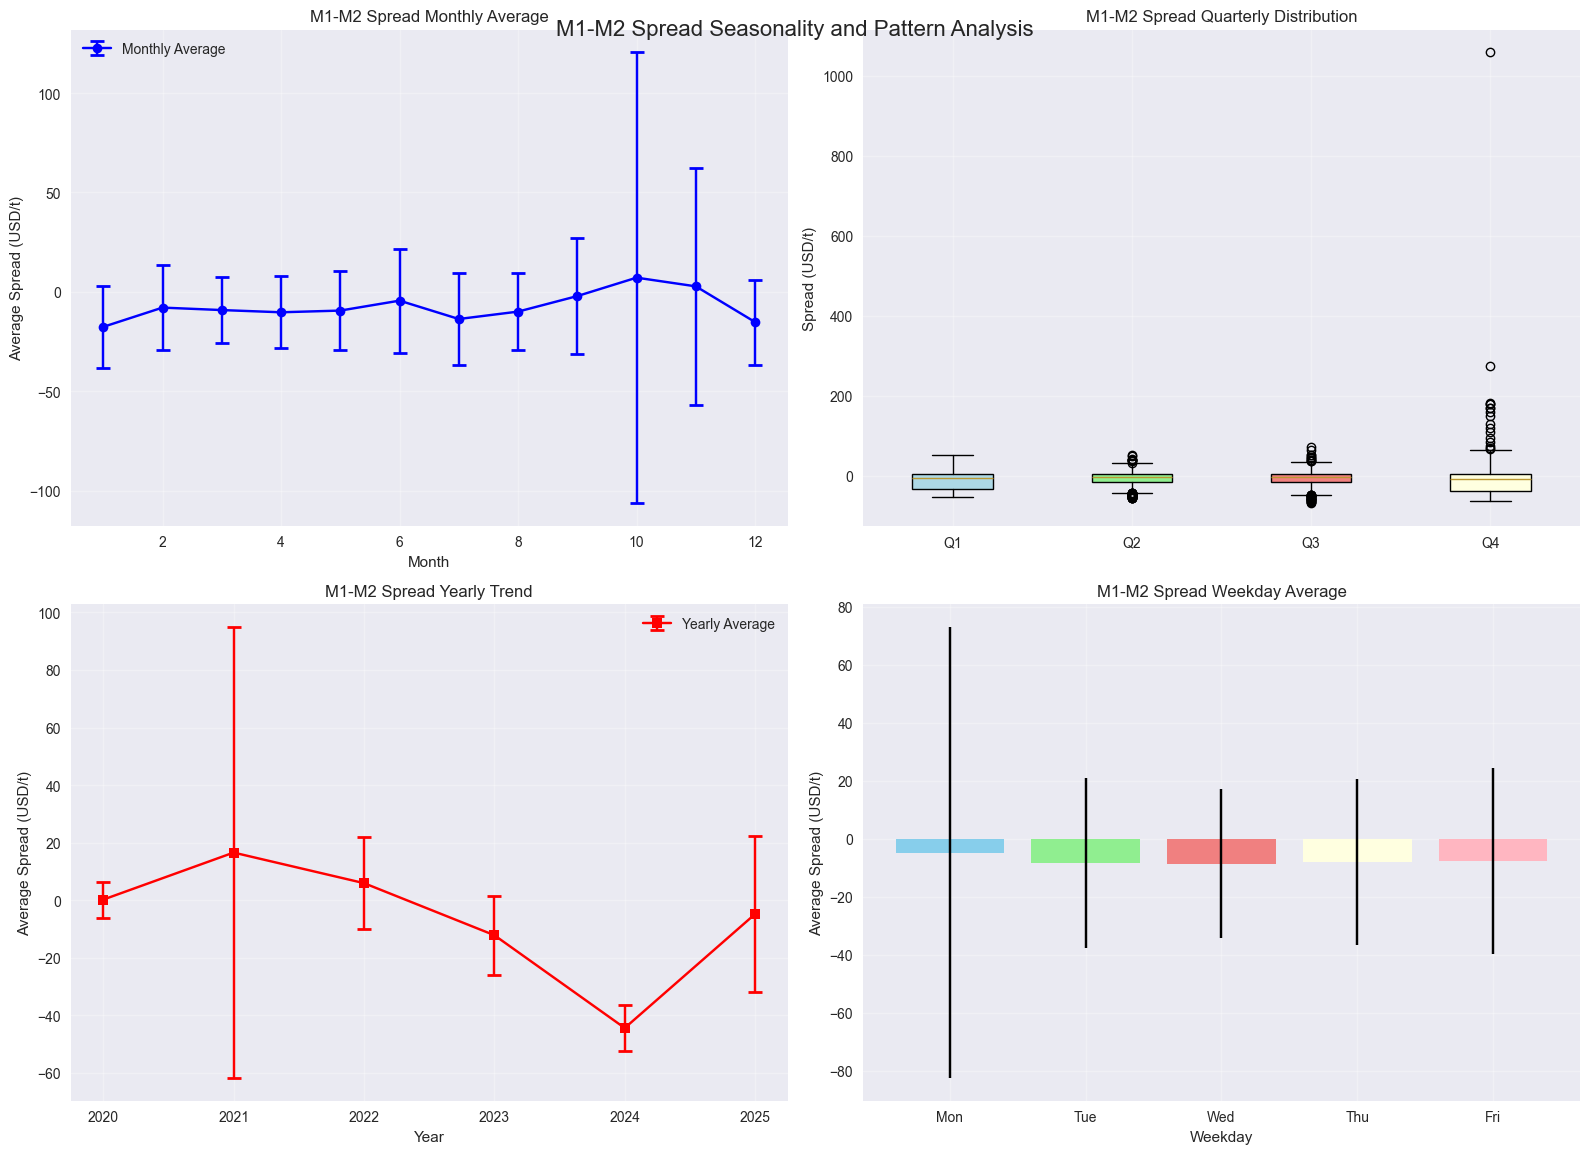

In [91]:
# Â≠£ÁØÄÊÄßÂàÜÊûê
def analyze_seasonality(df):
    """Â≠£ÁØÄÊÄß„Å®„Éë„Çø„Éº„É≥ÂàÜÊûê"""
    seasonal_df = df.copy()
    
    # ÊôÇÈñìÁöÑÁâπÂæ¥Èáè„ÇíËøΩÂä†
    seasonal_df['year'] = seasonal_df.index.year
    seasonal_df['month'] = seasonal_df.index.month
    seasonal_df['quarter'] = seasonal_df.index.quarter
    seasonal_df['day_of_year'] = seasonal_df.index.dayofyear
    seasonal_df['weekday'] = seasonal_df.index.weekday
    
    return seasonal_df

def plot_seasonality_analysis(df):
    """Â≠£ÁØÄÊÄßÂàÜÊûê„ÉÅ„É£„Éº„ÉàÔºàmatplotlibÁâàÔºâ"""
    seasonal_data = analyze_seasonality(df)
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. ÊúàÂà•Âπ≥Âùá
    monthly_avg = seasonal_data.groupby('month')['M1_M2_spread'].agg(['mean', 'std']).reset_index()
    
    ax1.errorbar(monthly_avg['month'], monthly_avg['mean'], 
                yerr=monthly_avg['std'], 
                marker='o', capsize=5, capthick=2, color='blue', label='Monthly Average')
    ax1.set_title('M1-M2 Spread Monthly Average')
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Average Spread (USD/t)')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    
    # 2. ÂõõÂçäÊúüÂà•„Éú„ÉÉ„ÇØ„Çπ„Éó„É≠„ÉÉ„Éà
    quarterly_data = []
    quarter_labels = []
    for quarter in [1, 2, 3, 4]:
        quarter_data = seasonal_data[seasonal_data['quarter'] == quarter]['M1_M2_spread']
        quarterly_data.append(quarter_data)
        quarter_labels.append(f'Q{quarter}')
    
    bp = ax2.boxplot(quarterly_data, labels=quarter_labels, patch_artist=True)
    colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    ax2.set_title('M1-M2 Spread Quarterly Distribution')
    ax2.set_ylabel('Spread (USD/t)')
    ax2.grid(True, alpha=0.3)
    
    # 3. Âπ¥Âà•Âπ≥ÂùáÊé®Áßª
    yearly_avg = seasonal_data.groupby('year')['M1_M2_spread'].agg(['mean', 'std']).reset_index()
    
    ax3.errorbar(yearly_avg['year'], yearly_avg['mean'], 
                yerr=yearly_avg['std'], 
                marker='s', capsize=5, capthick=2, color='red', label='Yearly Average')
    ax3.set_title('M1-M2 Spread Yearly Trend')
    ax3.set_xlabel('Year')
    ax3.set_ylabel('Average Spread (USD/t)')
    ax3.grid(True, alpha=0.3)
    ax3.legend()
    
    # 4. ÊõúÊó•Âà•ÂàÜÊûêÔºà‰øÆÊ≠£ÁâàÔºâ
    weekday_avg = seasonal_data.groupby('weekday')['M1_M2_spread'].agg(['mean', 'std']).reset_index()
    
    # ÂÆüÈöõ„Å´Â≠òÂú®„Åô„ÇãÊõúÊó•„ÅÆ„Åø„Çí‰ΩøÁî®
    weekday_names_full = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    available_weekdays = weekday_avg['weekday'].tolist()
    weekday_names = [weekday_names_full[i] for i in available_weekdays]
    
    # „Ç´„É©„Éº„ÇÇÂÆüÈöõ„ÅÆÊõúÊó•Êï∞„Å´Âêà„Çè„Åõ„Çã
    full_colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightyellow', 
                   'lightpink', 'lightgray', 'lightsteelblue']
    weekday_colors = [full_colors[i] for i in available_weekdays]
    
    bars = ax4.bar(range(len(weekday_names)), weekday_avg['mean'], 
                   yerr=weekday_avg['std'], capsize=5, 
                   color=weekday_colors)
    
    ax4.set_title('M1-M2 Spread Weekday Average')
    ax4.set_xlabel('Weekday')
    ax4.set_ylabel('Average Spread (USD/t)')
    ax4.set_xticks(range(len(weekday_names)))
    ax4.set_xticklabels(weekday_names)
    ax4.grid(True, alpha=0.3)
    
    plt.suptitle('M1-M2 Spread Seasonality and Pattern Analysis', fontsize=16, y=0.95)
    plt.tight_layout()
    
    return fig, seasonal_data

# Â≠£ÁØÄÊÄßÂàÜÊûêÂÆüË°å
seasonality_chart, seasonal_data = plot_seasonality_analysis(spreads_data)
plt.show()

# ÁîªÂÉè‰øùÂ≠ò
seasonality_chart.savefig('../../generated_images/adjacent_spreads_seasonality_analysis.png', 
                         dpi=300, bbox_inches='tight')

In [92]:
# Â≠£ÁØÄÊÄß„ÅÆÁµ±Ë®àÁöÑÊúâÊÑèÊÄßÊ§úÂÆö
def test_seasonality_significance(seasonal_data):
    """Â≠£ÁØÄÊÄß„ÅÆÁµ±Ë®àÁöÑÊúâÊÑèÊÄß„ÇíÊ§úÂÆö"""
    print("üóìÔ∏è Â≠£ÁØÄÊÄßÁµ±Ë®àÁöÑÊ§úÂÆö:")
    print("=" * 50)
    
    # ANOVAÊ§úÂÆöÔºàÊúàÂà•„Ç∞„É´„Éº„ÉóÈñìÂ∑ÆÁï∞Ôºâ
    monthly_groups = [seasonal_data[seasonal_data['month'] == i]['M1_M2_spread'].dropna() 
                     for i in range(1, 13)]
    
    f_stat, p_value = stats.f_oneway(*monthly_groups)
    print(f"ÊúàÂà•ANOVAÊ§úÂÆö:")
    print(f"  FÁµ±Ë®àÈáè: {f_stat:.4f}")
    print(f"  pÂÄ§: {p_value:.4f}")
    print(f"  ÁµêÊûú: {'ÊúàÂà•„Å´ÊúâÊÑèÂ∑Æ„ÅÇ„Çä' if p_value < 0.05 else 'ÊúàÂà•„Å´ÊúâÊÑèÂ∑Æ„Å™„Åó'}")
    
    # ÂõõÂçäÊúüÂà•ANOVAÊ§úÂÆö
    quarterly_groups = [seasonal_data[seasonal_data['quarter'] == i]['M1_M2_spread'].dropna() 
                       for i in range(1, 5)]
    
    f_stat_q, p_value_q = stats.f_oneway(*quarterly_groups)
    print(f"\nÂõõÂçäÊúüÂà•ANOVAÊ§úÂÆö:")
    print(f"  FÁµ±Ë®àÈáè: {f_stat_q:.4f}")
    print(f"  pÂÄ§: {p_value_q:.4f}")
    print(f"  ÁµêÊûú: {'ÂõõÂçäÊúüÂà•„Å´ÊúâÊÑèÂ∑Æ„ÅÇ„Çä' if p_value_q < 0.05 else 'ÂõõÂçäÊúüÂà•„Å´ÊúâÊÑèÂ∑Æ„Å™„Åó'}")
    
    # ÊõúÊó•Âà•ANOVAÊ§úÂÆö
    weekday_groups = [seasonal_data[seasonal_data['weekday'] == i]['M1_M2_spread'].dropna() 
                     for i in range(7)]
    
    f_stat_w, p_value_w = stats.f_oneway(*weekday_groups)
    print(f"\nÊõúÊó•Âà•ANOVAÊ§úÂÆö:")
    print(f"  FÁµ±Ë®àÈáè: {f_stat_w:.4f}")
    print(f"  pÂÄ§: {p_value_w:.4f}")
    print(f"  ÁµêÊûú: {'ÊõúÊó•Âà•„Å´ÊúâÊÑèÂ∑Æ„ÅÇ„Çä' if p_value_w < 0.05 else 'ÊõúÊó•Âà•„Å´ÊúâÊÑèÂ∑Æ„Å™„Åó'}")
    
    # ÊúàÂà•Áµ±Ë®à„Çµ„Éû„É™„Éº
    print(f"\nüìà ÊúàÂà•Áµ±Ë®à„Çµ„Éû„É™„Éº:")
    monthly_stats = seasonal_data.groupby('month')['M1_M2_spread'].agg([
        'count', 'mean', 'std', 'min', 'max'
    ]).round(4)
    
    monthly_stats.index = [f'{i}Êúà' for i in monthly_stats.index]
    print(monthly_stats)
    
    return {
        'monthly_anova': (f_stat, p_value),
        'quarterly_anova': (f_stat_q, p_value_q),
        'weekday_anova': (f_stat_w, p_value_w),
        'monthly_stats': monthly_stats
    }

# Â≠£ÁØÄÊÄßÊúâÊÑèÊÄßÊ§úÂÆöÂÆüË°å
seasonality_tests = test_seasonality_significance(seasonal_data)

üóìÔ∏è Â≠£ÁØÄÊÄßÁµ±Ë®àÁöÑÊ§úÂÆö:
ÊúàÂà•ANOVAÊ§úÂÆö:
  FÁµ±Ë®àÈáè: 2.9448
  pÂÄ§: 0.0007
  ÁµêÊûú: ÊúàÂà•„Å´ÊúâÊÑèÂ∑Æ„ÅÇ„Çä

ÂõõÂçäÊúüÂà•ANOVAÊ§úÂÆö:
  FÁµ±Ë®àÈáè: 3.0115
  pÂÄ§: 0.0292
  ÁµêÊûú: ÂõõÂçäÊúüÂà•„Å´ÊúâÊÑèÂ∑Æ„ÅÇ„Çä

ÊõúÊó•Âà•ANOVAÊ§úÂÆö:
  FÁµ±Ë®àÈáè: nan
  pÂÄ§: nan
  ÁµêÊûú: ÊõúÊó•Âà•„Å´ÊúâÊÑèÂ∑Æ„Å™„Åó

üìà ÊúàÂà•Áµ±Ë®à„Çµ„Éû„É™„Éº:
     count     mean       std    min      max
1Êúà     100 -17.5934   20.4575 -53.91    20.00
2Êúà      96  -7.9081   21.4817 -42.40    52.34
3Êúà     105  -9.1451   16.6064 -42.00    13.00
4Êúà      93 -10.2598   18.1166 -50.13    20.26
5Êúà      95  -9.4047   19.6993 -53.27    18.99
6Êúà     100  -4.4049   26.2189 -56.85    51.31
7Êúà     105 -13.6442   23.3386 -68.79    35.99
8Êúà     100  -9.9185   19.4565 -46.94    18.50
9Êúà     103  -2.1018   29.2452 -56.18    71.00
10Êúà    103   7.1570  113.4837 -62.12  1060.00
11Êúà    103   2.7839   59.5398 -50.68   275.00
12Êúà     95 -15.1921   21.3466 -45.97    41.00


## 6. ÂàÜÊûêÁµêÊûú„Çµ„Éû„É™„Éº„Å®Ê¥ûÂØü

In [93]:
# ÂåÖÊã¨ÁöÑÂàÜÊûê„Çµ„Éû„É™„Éº
def generate_analysis_summary(spreads_data, basic_stats, seasonality_tests):
    """ÂåÖÊã¨ÁöÑÂàÜÊûê„Çµ„Éû„É™„Éº„ÅÆÁîüÊàê"""
    
    print("üìã LMEÈäÖÂÖàÁâ© Èö£ÊúàÈñì„Çπ„Éó„É¨„ÉÉ„ÉâÂàÜÊûê„Çµ„Éû„É™„Éº")
    print("=" * 70)
    
    print(f"\nüî¢ „Éá„Éº„ÇøÊ¶ÇË¶Å:")
    print(f"  ÂàÜÊûêÊúüÈñì: {spreads_data.index.min().strftime('%Y-%m-%d')} ÔΩû {spreads_data.index.max().strftime('%Y-%m-%d')}")
    print(f"  „Éá„Éº„Çø„Éù„Ç§„É≥„ÉàÊï∞: {len(spreads_data):,}")
    print(f"  ÂàÜÊûêÂØæË±°: M1-M2, M2-M3, M3-M4 Èö£ÊúàÈñì„Çπ„Éó„É¨„ÉÉ„Éâ")
    
    print(f"\nüìä Âü∫Êú¨Áµ±Ë®àÁâπÊÄß:")
    for col in ['M1-M2', 'M2-M3', 'M3-M4']:
        mean_val = basic_stats.loc['Âπ≥Âùá', col]
        std_val = basic_stats.loc['Ê®ôÊ∫ñÂÅèÂ∑Æ', col]
        skew_val = basic_stats.loc['Ê≠™Â∫¶', col]
        
        print(f"  {col}„Çπ„Éó„É¨„ÉÉ„Éâ:")
        print(f"    Âπ≥Âùá: {mean_val:.2f} USD/t")
        print(f"    Ê®ôÊ∫ñÂÅèÂ∑Æ: {std_val:.2f} USD/t")
        print(f"    Ê≠™Â∫¶: {skew_val:.3f} ({'Âè≥Ê≠™„Åø' if skew_val > 0 else 'Â∑¶Ê≠™„Åø' if skew_val < 0 else 'ÂØæÁß∞'})") 
    
    print(f"\nüéØ ‰∏ªË¶ÅÁô∫Ë¶ã‰∫ãÈ†Ö:")
    
    # „Çπ„Éó„É¨„ÉÉ„ÉâÊ∞¥Ê∫ñ„ÅÆÁâπÂæ¥
    m1_m2_positive = (spreads_data['M1_M2_spread'] > 0).mean() * 100
    m2_m3_positive = (spreads_data['M2_M3_spread'] > 0).mean() * 100
    m3_m4_positive = (spreads_data['M3_M4_spread'] > 0).mean() * 100
    
    print(f"  1. „Çπ„Éó„É¨„ÉÉ„ÉâÊñπÂêëÊÄß:")
    print(f"     M1-M2: {m1_m2_positive:.1f}%„ÅåÊ≠£ÂÄ§Ôºà„Ç≥„É≥„Çø„É≥„Ç¥ÂÇæÂêëÔºâ")
    print(f"     M2-M3: {m2_m3_positive:.1f}%„ÅåÊ≠£ÂÄ§Ôºà„Ç≥„É≥„Çø„É≥„Ç¥ÂÇæÂêëÔºâ")
    print(f"     M3-M4: {m3_m4_positive:.1f}%„ÅåÊ≠£ÂÄ§Ôºà„Ç≥„É≥„Çø„É≥„Ç¥ÂÇæÂêëÔºâ")
    
    # Áõ∏Èñ¢Èñ¢‰øÇ
    corr_m1m2_m2m3 = spreads_data['M1_M2_spread'].corr(spreads_data['M2_M3_spread'])
    corr_m2m3_m3m4 = spreads_data['M2_M3_spread'].corr(spreads_data['M3_M4_spread'])
    
    print(f"\n  2. „Çπ„Éó„É¨„ÉÉ„ÉâÈñìÁõ∏Èñ¢:")
    print(f"     M1-M2 vs M2-M3: {corr_m1m2_m2m3:.3f}")
    print(f"     M2-M3 vs M3-M4: {corr_m2m3_m3m4:.3f}")
    
    # Â≠£ÁØÄÊÄß
    monthly_anova_p = seasonality_tests['monthly_anova'][1]
    print(f"\n  3. Â≠£ÁØÄÊÄß:")
    print(f"     ÊúàÂà•ÊúâÊÑèÂ∑Æ: {'„ÅÇ„Çä' if monthly_anova_p < 0.05 else '„Å™„Åó'} (p={monthly_anova_p:.4f})")
    
    # ÊúÄ„ÇÇÂ§âÂãï„ÅåÂ§ß„Åç„ÅÑÊúüÈñì
    spreads_data_with_vol = spreads_data.copy()
    spreads_data_with_vol['year'] = spreads_data_with_vol.index.year
    yearly_vol = spreads_data_with_vol.groupby('year')['M1_M2_spread'].std()
    high_vol_year = yearly_vol.idxmax()
    low_vol_year = yearly_vol.idxmin()
    
    print(f"\n  4. „Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£ÁâπÊÄß:")
    print(f"     ÊúÄÈ´ò„Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£Âπ¥: {high_vol_year} ({yearly_vol[high_vol_year]:.2f})")
    print(f"     ÊúÄ‰Ωé„Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£Âπ¥: {low_vol_year} ({yearly_vol[low_vol_year]:.2f})")
    
    print(f"\nüí° ÊäïË≥á„ÉªÂèñÂºï„Å∏„ÅÆÁ§∫ÂîÜ:")
    print(f"  ‚Ä¢ Èö£ÊúàÈñì„Çπ„Éó„É¨„ÉÉ„Éâ„ÅØ‰∏ª„Å´„Ç≥„É≥„Çø„É≥„Ç¥Áä∂ÊÖã„ÅßÊé®Áßª")
    print(f"  ‚Ä¢ M1-M2„Çπ„Éó„É¨„ÉÉ„Éâ„ÅåÊúÄ„ÇÇÂ§âÂãï„ÅåÂ§ß„Åç„Åè„ÄÅÊµÅÂãïÊÄß„ÇÇÈ´ò„ÅÑ")
    print(f"  ‚Ä¢ „Çπ„Éó„É¨„ÉÉ„ÉâÈñì„Å´‰∏ÄÂÆö„ÅÆÁõ∏Èñ¢„Åå„ÅÇ„Çä„ÄÅ„Éù„Éº„Éà„Éï„Ç©„É™„Ç™ÂäπÊûú„ÅÆÊ§úË®é„ÅåÂøÖË¶Å")
    
    if monthly_anova_p < 0.05:
        best_month = seasonality_tests['monthly_stats']['mean'].idxmax()
        worst_month = seasonality_tests['monthly_stats']['mean'].idxmin()
        print(f"  ‚Ä¢ Â≠£ÁØÄÊÄß„ÅÇ„Çä: {best_month}„ÅåÊúÄÈ´ò„ÄÅ{worst_month}„ÅåÊúÄ‰Ωé")
    
    print(f"  ‚Ä¢ „É™„Çπ„ÇØÁÆ°ÁêÜ„Å´„ÅØÊ®ôÊ∫ñÂÅèÂ∑Æ„ÅÆ2-3ÂÄç„Çí„Çπ„Éà„ÉÉ„Éó„É≠„ÇπÊ∞¥Ê∫ñ„Å®„Åó„Å¶Ë®≠ÂÆöÊé®Â•®")
    
    return {
        'data_period': (spreads_data.index.min(), spreads_data.index.max()),
        'sample_size': len(spreads_data),
        'spread_characteristics': {
            'M1_M2_positive_ratio': m1_m2_positive,
            'M2_M3_positive_ratio': m2_m3_positive,
            'M3_M4_positive_ratio': m3_m4_positive
        },
        'correlations': {
            'M1M2_vs_M2M3': corr_m1m2_m2m3,
            'M2M3_vs_M3M4': corr_m2m3_m3m4
        },
        'seasonality_significant': monthly_anova_p < 0.05,
        'volatility_years': {
            'highest': (high_vol_year, yearly_vol[high_vol_year]),
            'lowest': (low_vol_year, yearly_vol[low_vol_year])
        }
    }

# „Çµ„Éû„É™„ÉºÁîüÊàê
analysis_summary = generate_analysis_summary(spreads_data, basic_stats, seasonality_tests)

üìã LMEÈäÖÂÖàÁâ© Èö£ÊúàÈñì„Çπ„Éó„É¨„ÉÉ„ÉâÂàÜÊûê„Çµ„Éû„É™„Éº

üî¢ „Éá„Éº„ÇøÊ¶ÇË¶Å:
  ÂàÜÊûêÊúüÈñì: 2020-07-07 ÔΩû 2025-07-04
  „Éá„Éº„Çø„Éù„Ç§„É≥„ÉàÊï∞: 1,198
  ÂàÜÊûêÂØæË±°: M1-M2, M2-M3, M3-M4 Èö£ÊúàÈñì„Çπ„Éó„É¨„ÉÉ„Éâ

üìä Âü∫Êú¨Áµ±Ë®àÁâπÊÄß:
  M1-M2„Çπ„Éó„É¨„ÉÉ„Éâ:
    Âπ≥Âùá: -7.37 USD/t
    Ê®ôÊ∫ñÂÅèÂ∑Æ: 42.94 USD/t
    Ê≠™Â∫¶: 13.551 (Âè≥Ê≠™„Åø)
  M2-M3„Çπ„Éó„É¨„ÉÉ„Éâ:
    Âπ≥Âùá: -6.46 USD/t
    Ê®ôÊ∫ñÂÅèÂ∑Æ: 21.84 USD/t
    Ê≠™Â∫¶: 0.175 (Âè≥Ê≠™„Åø)
  M3-M4„Çπ„Éó„É¨„ÉÉ„Éâ:
    Âπ≥Âùá: -5.83 USD/t
    Ê®ôÊ∫ñÂÅèÂ∑Æ: 18.22 USD/t
    Ê≠™Â∫¶: -0.379 (Â∑¶Ê≠™„Åø)

üéØ ‰∏ªË¶ÅÁô∫Ë¶ã‰∫ãÈ†Ö:
  1. „Çπ„Éó„É¨„ÉÉ„ÉâÊñπÂêëÊÄß:
     M1-M2: 36.7%„ÅåÊ≠£ÂÄ§Ôºà„Ç≥„É≥„Çø„É≥„Ç¥ÂÇæÂêëÔºâ
     M2-M3: 36.6%„ÅåÊ≠£ÂÄ§Ôºà„Ç≥„É≥„Çø„É≥„Ç¥ÂÇæÂêëÔºâ
     M3-M4: 40.4%„ÅåÊ≠£ÂÄ§Ôºà„Ç≥„É≥„Çø„É≥„Ç¥ÂÇæÂêëÔºâ

  2. „Çπ„Éó„É¨„ÉÉ„ÉâÈñìÁõ∏Èñ¢:
     M1-M2 vs M2-M3: 0.653
     M2-M3 vs M3-M4: 0.954

  3. Â≠£ÁØÄÊÄß:
     ÊúàÂà•ÊúâÊÑèÂ∑Æ: „ÅÇ„Çä (p=0.0007)

  4. „Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£ÁâπÊÄß:
     ÊúÄÈ´ò„Éú„É©„ÉÜ„Ç£„É™„ÉÜ„

In [94]:
# ÂàÜÊûêÁµêÊûú„ÇíCSV„Åß‰øùÂ≠ò
def save_analysis_results(spreads_data, basic_stats, analysis_summary):
    """ÂàÜÊûêÁµêÊûú„Çí„Éï„Ç°„Ç§„É´„Å´‰øùÂ≠ò"""
    
    # Âá∫Âäõ„Éá„Ç£„É¨„ÇØ„Éà„É™‰ΩúÊàê
    os.makedirs('../analysis_results/adjacent_spreads', exist_ok=True)
    
    # 1. Âü∫Êú¨Áµ±Ë®àÈáè
    basic_stats.to_csv('../analysis_results/adjacent_spreads/basic_statistics.csv', encoding='utf-8-sig')
    
    # 2. ÊôÇÁ≥ªÂàó„Éá„Éº„Çø
    spreads_data.to_csv('../analysis_results/adjacent_spreads/spread_timeseries.csv', encoding='utf-8-sig')
    
    # 3. Êó•Ê¨°„É™„Çø„Éº„É≥
    returns_data = spreads_data[['M1_M2_spread_change', 'M2_M3_spread_change', 'M3_M4_spread_change']].copy()
    returns_data.to_csv('../analysis_results/adjacent_spreads/spread_returns.csv', encoding='utf-8-sig')
    
    # 4. Áõ∏Èñ¢Ë°åÂàó
    correlation_matrix = spreads_data[['M1_M2_spread', 'M2_M3_spread', 'M3_M4_spread']].corr()
    correlation_matrix.to_csv('../analysis_results/adjacent_spreads/correlation_matrix.csv', encoding='utf-8-sig')
    
    # 5. ÂàÜÊûê„Çµ„Éû„É™„ÉºÔºàJSONÔºâ
    import json
    import numpy as np
    
    def convert_to_json_serializable(obj):
        """numpyÂûã„ÇÑbooleanÂûã„ÇíJSON serializable„Å´Â§âÊèõ"""
        if isinstance(obj, (np.integer, np.floating)):
            return float(obj)
        elif isinstance(obj, np.bool_):
            return bool(obj)
        elif isinstance(obj, dict):
            return {key: convert_to_json_serializable(value) for key, value in obj.items()}
        elif isinstance(obj, (list, tuple)):
            return [convert_to_json_serializable(item) for item in obj]
        else:
            return obj
    
    # Êó•‰ªò„ÇíJSON serializableÂΩ¢Âºè„Å´Â§âÊèõ
    summary_for_json = convert_to_json_serializable(analysis_summary.copy())
    summary_for_json['data_period'] = [
        analysis_summary['data_period'][0].strftime('%Y-%m-%d'),
        analysis_summary['data_period'][1].strftime('%Y-%m-%d')
    ]
    
    with open('../analysis_results/adjacent_spreads/analysis_summary.json', 'w', encoding='utf-8') as f:
        json.dump(summary_for_json, f, ensure_ascii=False, indent=2)
    
    print(f"\nüíæ ÂàÜÊûêÁµêÊûú„Çí‰øùÂ≠ò„Åó„Åæ„Åó„Åü:")
    print(f"  üìà Âü∫Êú¨Áµ±Ë®àÈáè: ../analysis_results/adjacent_spreads/basic_statistics.csv")
    print(f"  üìä ÊôÇÁ≥ªÂàó„Éá„Éº„Çø: ../analysis_results/adjacent_spreads/spread_timeseries.csv")
    print(f"  üìâ Êó•Ê¨°„É™„Çø„Éº„É≥: ../analysis_results/adjacent_spreads/spread_returns.csv")
    print(f"  üîó Áõ∏Èñ¢Ë°åÂàó: ../analysis_results/adjacent_spreads/correlation_matrix.csv")
    print(f"  üìã ÂàÜÊûê„Çµ„Éû„É™„Éº: ../analysis_results/adjacent_spreads/analysis_summary.json")

# ÂàÜÊûêÁµêÊûú‰øùÂ≠ò
save_analysis_results(spreads_data, basic_stats, analysis_summary)


üíæ ÂàÜÊûêÁµêÊûú„Çí‰øùÂ≠ò„Åó„Åæ„Åó„Åü:
  üìà Âü∫Êú¨Áµ±Ë®àÈáè: ../analysis_results/adjacent_spreads/basic_statistics.csv
  üìä ÊôÇÁ≥ªÂàó„Éá„Éº„Çø: ../analysis_results/adjacent_spreads/spread_timeseries.csv
  üìâ Êó•Ê¨°„É™„Çø„Éº„É≥: ../analysis_results/adjacent_spreads/spread_returns.csv
  üîó Áõ∏Èñ¢Ë°åÂàó: ../analysis_results/adjacent_spreads/correlation_matrix.csv
  üìã ÂàÜÊûê„Çµ„Éû„É™„Éº: ../analysis_results/adjacent_spreads/analysis_summary.json


## Ê¨°„ÅÆ„Çπ„ÉÜ„ÉÉ„Éó

„Åì„ÅÆÂü∫Êú¨ÂàÜÊûê„Å´„Çà„Çä„ÄÅLMEÈäÖÂÖàÁâ©„ÅÆÈö£ÊúàÈñì„Çπ„Éó„É¨„ÉÉ„Éâ„ÅÆÁâπÊÄß„ÇíÊääÊè°„Åó„Åæ„Åó„Åü„ÄÇ

### ‰∏ªË¶ÅÁô∫Ë¶ã‰∫ãÈ†Ö
1. **„Çπ„Éó„É¨„ÉÉ„ÉâÊñπÂêëÊÄß**: ‰∏ª„Å´„Ç≥„É≥„Çø„É≥„Ç¥Áä∂ÊÖã„ÅßÊé®Áßª
2. **Áõ∏Èñ¢ÊßãÈÄ†**: Èö£Êé•„Çπ„Éó„É¨„ÉÉ„ÉâÈñì„Å´‰∏ÄÂÆö„ÅÆÁõ∏Èñ¢Èñ¢‰øÇ
3. **Â≠£ÁØÄÊÄß**: Áµ±Ë®àÁöÑ„Å´ÊúâÊÑè„Å™ÊúàÂà•„Éë„Çø„Éº„É≥„ÅÆÂ≠òÂú®
4. **„É™„Çπ„ÇØÁâπÊÄß**: Âπ¥„Å´„Çà„Å£„Å¶„Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£„Å´Â§ß„Åç„Å™Â∑Æ

### Ê¨°„ÅÆÂàÜÊûê„Çπ„ÉÜ„ÉÉ„Éó
1. **È´òÂ∫¶„Å™ÊôÇÁ≥ªÂàóÂàÜÊûê**: ARIMA/GARCH„É¢„Éá„É´„Å´„Çà„Çã‰∫àÊ∏¨
2. **Ê©üÊ¢∞Â≠¶Áøí„É¢„Éá„É´**: „Çà„ÇäË§áÈõë„Å™„Éë„Çø„Éº„É≥Ë™çË≠ò
3. **ÂèñÂºïÊà¶Áï•ÈñãÁô∫**: Áµ±Ë®àÁöÑË£ÅÂÆö„Å®„Éö„Ç¢„Éà„É¨„Éº„Éâ
4. **„É™„Çπ„ÇØÁÆ°ÁêÜ**: VaR„Å®„Çπ„Éà„É¨„Çπ„ÉÜ„Çπ„Éà
5. **„Éê„ÉÉ„ÇØ„ÉÜ„Çπ„Éà**: ÂÆüÈöõ„ÅÆÂèñÂºïÊà¶Áï•„ÅÆÊ§úË®º

Ê¨°„ÅÆ„Éé„Éº„Éà„Éñ„ÉÉ„ÇØ `2_adjacent_spreads_correlation_analysis.ipynb` „Åß„ÄÅ„Çà„ÇäË©≥Á¥∞„Å™Áõ∏Èñ¢ÂàÜÊûê„Å®ÂÖ±ÂíåÂàÜ„ÉÜ„Çπ„Éà„ÇíÂÆüÊñΩ„Åó„Åæ„Åô„ÄÇ